# Goal


### Implement Forward and Backward Feature selection algorithms from scratch with MSE as the
### metric.

# Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.datasets import load_diabetes

# Loading dataset

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
X = diabetes.data
y = diabetes.target

In [6]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
x_train_norm = X_norm[:300, :]
y_train = y[:300]

# Forward feature selection algorithm

In [9]:
def forward_feature_selection(X, y):
    n, p = X.shape
    selected_features = []
    mses = []
    best_mse = np.inf
    
    for i in range(p):
        candidate_errors = []
        for j in range(p):
            if j not in selected_features:
                model_features = selected_features + [j]
                X_subset = X[:, model_features]
                model = np.linalg.lstsq(X_subset, y, rcond=None)[0]
                y_pred = X_subset @ model
                error = np.mean((y - y_pred) ** 2)
                candidate_errors.append((error, j))
        
        candidate_errors.sort()
        best_candidate_error, best_candidate_feature = candidate_errors[0]
        mses.append(best_candidate_error)
        
        if best_candidate_error < best_mse:
            selected_features.append(best_candidate_feature)
            best_mse = best_candidate_error
        else:
            break
    
    plt.plot(range(1, len(selected_features)+1), mses, '-o')
    plt.xlabel('Number of Features')
    plt.ylabel('MSE')
    plt.title('Forward Feature Selection')
    plt.show()
    
    return selected_features, best_mse


# Backward feature selection algorithm

In [10]:
def backward_feature_selection(X, y):
    num_features = X.shape[1]
    selected_features = list(range(num_features))

    mses = []

    best_mse = float('inf')
    best_features = None

    for i in range(num_features):
        mse_features = []
        for feature in selected_features:
            remaining_features = [f for f in selected_features if f != feature]
            X_subset = X[:, remaining_features]
            mse = np.mean((y - np.dot(X_subset, np.linalg.lstsq(X_subset, y, rcond=None)[0])) ** 2)
            mse_features.append(mse)

        mse_features = np.array(mse_features)
        best_feature = np.argmin(mse_features)
        best_mse = mse_features[best_feature]
        best_features = selected_features[:best_feature] + selected_features[best_feature+1:]

        selected_features = best_features[:]

        mses.append(best_mse)

    plt.plot(range(num_features, 0, -1), mses[::-1], '-o')
    plt.xlabel('Number of Features')
    plt.ylabel('MSE')

    return best_features, best_mse

# Run forward and backward selection algorithm

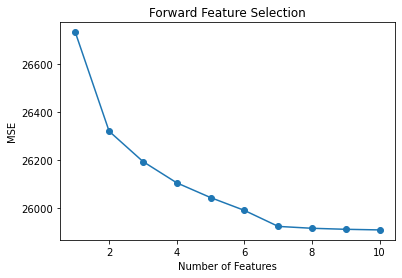

Forward selection: Best features = [2, 8, 4, 3, 1, 5, 6, 0, 7, 9], MSE = 25907.579899784774
Backward selection: Best features = [], MSE = 28245.176666666666


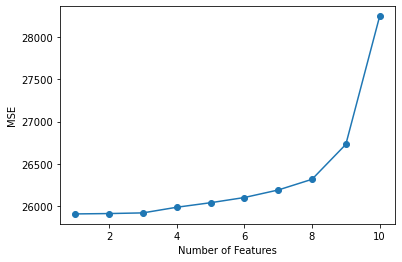

In [11]:
selected_features, best_mse = forward_feature_selection(x_train_norm, y_train)
print(f"Forward selection: Best features = {selected_features}, MSE = {best_mse}")

selected_features, best_mse = backward_feature_selection(x_train_norm, y_train)
print(f"Backward selection: Best features = {selected_features}, MSE = {best_mse}")
